

**Loading and Parsing Telugu Dataset:**



In [2]:
import re
import itertools

# Load the dataset
with open("/content/telugu.pos", "r", encoding="utf-8") as file:
    dataset_content = file.read()

# Extract sentences and their POS tags
sentences = re.findall(r'<Sentence id=\d+>.*?</Sentence>', dataset_content, re.DOTALL)

all_sentences = []
all_tags = []

for sentence in sentences:
    sentence_text = re.search(r'>(.*?)</Sentence>', sentence, re.DOTALL).group(1)
    tagged_words = sentence_text.strip().split()

    # Separate words and tags
    words = []
    tags = []
    for tagged_word in tagged_words:
        word, tag = tagged_word.rsplit("_", 1)
        words.append(word)
        tags.append(tag)

    all_sentences.append(words)
    all_tags.append(tags)

print(all_sentences)
print(all_tags)


[['4', '.'], ['ఆడిట్', 'నిర్వహణ', 'ఆడిటర్', 'ఒక', 'కొత్త', 'ఆడిట్', 'చేపట్టే', 'ముందు', 'సక్రమ', 'పద్ధతి', 'లో', 'కార్య', 'ప్రణాళికను', 'రూపొందించాలి', '.'], ['దాని', 'కనుగుణంగా', 'వ్యవహరించాలి', '.'], ['పత్రసహిత', 'సాక్ష్యాధారాల', 'తో', ',', 'వ్యవహారాల', 'ను', 'తనిఖీ', 'చేయాలి', '.'], ['ఆడిట్', 'చేసే', 'విధానం', 'సంస్థ', 'అవసరాల', 'ను', 'బట్టి', ',', 'అంతర్గత', 'తనిఖీన్', 'బట్టి', ',', 'ఇంకా', 'అనేక', 'ఇతర', 'విషయాల', 'ను', 'బట్టి', 'మారుతూఉంటుంది', '.'], ['పద్దుపుస్తకాలలో', 'ని', 'అంకగణిత', 'యదార్థత', 'ను', ',', 'సరిచూడటాని', 'కి', ',', 'సాక్ష్యాలు', 'సమాచారం', ',', 'వివరణలు', ',', 'అవసరమౌతాయి', '.'], ['సాక్ష్యాలు', 'వోచర్లరూపం', 'లో', ',', 'లేదా', 'పత్రాల', 'రూపం', 'లో', 'ఉండవచ్చు', '.'], ['కావలసిన', 'సమాచారాన్', 'ని', 'వివరణల', 'ను', 'ఆడిటర్', 'యాజమాన్యం', 'నుంచి', ',', 'సిబ్బంది', 'నుంచి', 'స్వీకరించి', 'వాటి', 'ఆధారం', 'తో', 'ఆడిట్', 'నిర్వహించాలి', '.'], ['ఖాతాదారుల', 'నుంచి', 'వచ్చిన', 'పత్రాల', 'ను', 'సాక్ష్యంగా', 'వాడుకోవచ్చు', '.'], ['సాధారణంగా', 'ఆడిటరు', 'కొనుగోలు', 'ఇన్వా

This code segment loads a Telugu dataset from a file, extracts sentences, and their corresponding POS tags. It uses regular expressions to parse the dataset, separates words and tags, and stores them in lists. The code demonstrates text data processing and extraction of linguistic information.

**Building Pair Pattern Matrix:**

In [3]:
from collections import defaultdict

# Initialize the pair pattern matrix
pair_pattern_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Function to extract adjacent NN-Verb-NN patterns from a list of POS tags and words
def extract_adjacent_nn_prep_nn_patterns(tags, words):
    patterns = []
    for i in range(len(tags) - 2):
        if tags[i].startswith("NN") and tags[i+1].startswith("PREP") and tags[i+2].startswith("NN"):
            patterns.append((words[i], words[i+2], words[i+1]))
    return patterns

# Iterate through all sentences and extract patterns
for tags, words in zip(all_tags, all_sentences):
    patterns = extract_adjacent_nn_prep_nn_patterns(tags, words)

    # Update the pair pattern matrix
    for pattern in patterns:
        noun1, noun2, prep = pattern
        pair_pattern_matrix[noun1][noun2][prep] += 1

# Print the pair pattern matrix with words
for noun1, noun2_dict in pair_pattern_matrix.items():
    for noun2, prep_dict in noun2_dict.items():
        for prep, frequency in prep_dict.items():
            print(f"({noun1}, {noun2}, {prep}): {frequency}")


(సమాచారాన్, వివరణల, ని): 1
(వివరణల, ఆడిటర్, ను): 1
(ఆధారం, ఆడిట్, తో): 1
(పత్రాల, సాక్ష్యంగా, ను): 1
(చెల్లింపుల, వసూళ్ళ, ను): 1
(కు, రశీదు, సంబంధించిన): 1
(సంస్థల, ఆర్థిక, లో): 1
(తనిఖీ, పద్ధతి, కింది): 1
(తనిఖీ, వివరాలు, గురించి): 1
(తనిఖీ, అక్కౌంటిగ్, లో): 1
(ఋణదాతల, సమాచారాన్, గురించి): 1
(పద్ధతుల, విషయాలు, గురించి): 1
(లెక్కల, ఆస్తి, ను): 1
(నియమావళి, నిబంధనల, లో): 1
(పుస్తకాల, తీర్మానాల, లోని): 1
(పుస్తకాల, యాజమాన్యం, ద్వారా): 1
(విషయాల, దృష్టి, ను): 1
(క్లయింటు, ఒప్పందం, తో): 1
(ఏతేదీ, ఏతేదీ, నుంచి): 1
(సొంతసిబ్బంది, ఆడిట్, తో): 1
(శ్రద్ధ, తనిఖీ, తో): 1
(శ్రద్ధ, కార్యక్రమం, తో): 1
(విషయం, ట్రస్టు, లో): 1
(వోచర్ల, తేదీల, ను): 1
(సిబ్బంది, ఆదేశాలు, కి): 1
(నకలు, అధికారులు, ను): 1
(ప్రణాళిక, ప్రయోజనాలు, వల్ల): 1
(ప్రణాళిక, పని, ప్రకారం): 1
(నైపుణ్యం, వ్యక్తుల, గల): 1
(నైపుణ్యం, కూడినపని, తో): 1
(సహకారం, ఆడిట్, లో): 1
(యాజమాన్యం, సిబ్బంది, నుంచీ): 1
(అవసరాల, దృష్టి, ను): 1
(అవసరాల, కార్యక్రమం, కణుగుణంగా): 1
(నమూనాల, సిబ్బంది, ను): 1
(వరుస, సంతకం, లో): 1
(వ్యవస్థ, ఆడిటర్, గురించి): 1

This code segment is focused on building a pair pattern matrix based on the extracted POS-tagged sentences. We initialize the pair_pattern_matrix as a defaultdict nested within defaultdicts to represent patterns involving nouns (NN), verbs (VERB), and prepositions (PREP). The extract_adjacent_nn_prep_nn_patterns function is defined to identify and extract patterns where a noun (NN) is followed by a preposition (PREP) and another noun (NN). The code iterates through all sentences, extracts these patterns, and updates the pair pattern matrix. The matrix provides insights into the frequency of such patterns in the dataset.

**Calculating Matrix Size:**

In [4]:
# Initialize a set to store unique elements
rows = set()
columns=set()
height=set()

# Iterate through the pair pattern matrix and add unique elements
for noun1, noun2_dict in pair_pattern_matrix.items():
    for noun2, prep_dict in noun2_dict.items():
        for prep in prep_dict.keys():
            rows.add(noun1)
            columns.add(noun2)
            height.add(prep)

# Calculate the size of the matrix (number of unique elements)


# Print the size of the matrix
print("Size of the matrix:",len(rows)," x",len(columns)," x ",len(height))


Size of the matrix: 97  x 90  x  49


This code segment calculates the size of the matrix constructed in the previous segment. It initializes sets (rows, columns, and height) to store unique elements from the pair pattern matrix, including nouns, verbs, and prepositions. The code then iterates through the matrix to identify unique elements and adds them to the respective sets. Finally, it calculates and prints the size of the matrix, displaying it as the number of unique elements in the rows, columns, and height dimensions. This code segment helps us understand the dimensionality of the pattern matrix.

**Downloading necessary packages and Modules**

In [5]:
import nltk
nltk.download('treebank')


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [9]:
nltk.download('universal_tagset')
# load POS tagged corpora from NLTK
from nltk.corpus import treebank


treebank_corpus = treebank.tagged_sents(tagset='universal')

tagged_sentences = treebank_corpus


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


**Saving Tagged Sentences to Text File:**

In [10]:
# Specify the file path where you want to save the text file in Colab
output_file_path = "/content/all_sentences.txt"

# Iterate through tagged sentences and save each to the text file with a new line for each sentence
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for tagged_sentence in tagged_sentences:
        # Join the words and tags in the sentence and write to the file with a new line character
        sentence_text = ' '.join([f"{word}_{tag}" for word, tag in tagged_sentence])
        output_file.write(sentence_text + "\n")

print(f"All sentences have been saved to {output_file_path}.")


All sentences have been saved to /content/all_sentences.txt.


In [11]:
tagged_sentences=tagged_sentences[:100]
print(tagged_sentences)

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], ...]


In this code segment, we specify the file path where we intend to save the tagged sentences to a text file in a Colab environment. We then iterate through the tagged_sentences and write each sentence to the text file. Each sentence is represented as a string of words and tags separated by underscores. This step prepares the data for storage and future analysis, allowing us to export the processed linguistic data.

In [12]:
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

**Calculating Cosine and Soft Cosine Similarity:**

In [13]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert tagged sentences to plain text sentences
def tagged_to_text(tagged_sentence):
    return ' '.join([word for word, tag in tagged_sentence])

plain_text_sentences = [tagged_to_text(tagged_sentence) for tagged_sentence in tagged_sentences]

# Train a Word2Vec model on the plain text sentences
tokenized_sentences = [sentence.split() for sentence in plain_text_sentences]
word2vec_model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# Convert plain text sentences to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(plain_text_sentences)

# Calculate Cosine Similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define a function to calculate soft cosine similarity (same as before)
def soft_cosine_similarity(sentence1, sentence2):
    tokens1 = sentence1.split()
    tokens2 = sentence2.split()

    vector1 = np.mean([word2vec_model.wv[token] for token in tokens1 if token in word2vec_model.wv], axis=0)
    vector2 = np.mean([word2vec_model.wv[token] for token in tokens2 if token in word2vec_model.wv], axis=0)

    soft_cosine = cosine_similarity(vector1.reshape(1, -1), vector2.reshape(1, -1), dense_output=False)

    return soft_cosine[0, 0]

# Calculate Soft Cosine Similarity for all sentence pairs (same as before)
soft_cosine_similarities = np.zeros((len(plain_text_sentences), len(plain_text_sentences)))
for i in range(len(plain_text_sentences)):
    for j in range(len(plain_text_sentences)):
        soft_cosine_similarities[i, j] = soft_cosine_similarity(plain_text_sentences[i], plain_text_sentences[j])

# Print the results
print("Cosine Similarity:")
print(cosine_similarities)
print("\nSoft Cosine Similarity:")
print(soft_cosine_similarities)


Cosine Similarity:
[[1.         0.10975085 0.20688955 ... 0.0401786  0.05979196 0.00861912]
 [0.10975085 1.         0.08424405 ... 0.         0.07424789 0.01073415]
 [0.20688955 0.08424405 1.         ... 0.01064619 0.04202038 0.0157862 ]
 ...
 [0.0401786  0.         0.01064619 ... 1.         0.32942614 0.17782338]
 [0.05979196 0.07424789 0.04202038 ... 0.32942614 1.         0.15440939]
 [0.00861912 0.01073415 0.0157862  ... 0.17782338 0.15440939 1.        ]]

Soft Cosine Similarity:
[[1.         0.53598654 0.68954694 ... 0.64418817 0.64355147 0.58837479]
 [0.53598654 0.99999994 0.52711624 ... 0.4423753  0.62997693 0.44538668]
 [0.68954694 0.52711624 1.00000012 ... 0.74750006 0.74553049 0.64483285]
 ...
 [0.64418817 0.4423753  0.74750006 ... 0.99999994 0.75899851 0.71077746]
 [0.64355147 0.62997693 0.74553049 ... 0.75899851 1.         0.68074602]
 [0.58837479 0.44538668 0.64483285 ... 0.71077746 0.68074602 0.99999988]]


In this code segment, we perform calculations related to cosine similarity and soft cosine similarity between sentences. We start by converting the tagged sentences into plain text sentences. Next, we train a Word2Vec model on the plain text sentences, allowing us to represent words as vectors. We also convert the plain text sentences into TF-IDF vectors. We calculate cosine similarity between sentences using the TF-IDF vectors. Additionally, we define a function to compute soft cosine similarity, which takes into account Word2Vec embeddings. Finally, we calculate and print the similarity scores for both cosine and soft cosine similarities, providing insights into the semantic relationships between sentences.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


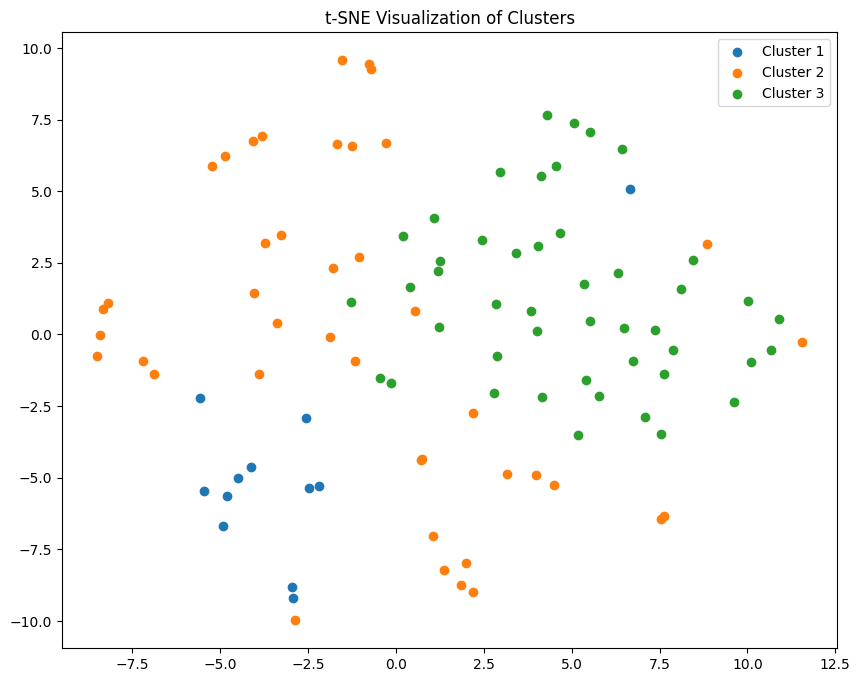

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

dissimilarity_matrix = 1 - cosine_similarities

num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(dissimilarity_matrix)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)  # You can also use n_components=3 for 3D visualization
tsne_embeddings = tsne.fit_transform(dissimilarity_matrix)

# Visualize the clustered sentences using a scatter plot
plt.figure(figsize=(10, 8))
for cluster_id in range(num_clusters):
    plt.scatter(
        tsne_embeddings[cluster_labels == cluster_id, 0],
        tsne_embeddings[cluster_labels == cluster_id, 1],
        label=f'Cluster {cluster_id + 1}',
    )

plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()


We start by calculating the dissimilarity matrix, which represents how dissimilar sentences are to each other. The dissimilarity matrix is computed by subtracting cosine similarity scores from 1. This matrix quantifies the dissimilarity between sentences, where lower values indicate greater similarity.

We specify the number of clusters num_clusters to which we want to group the sentences. In this example, we set it to 3, indicating that we want to cluster the sentences into three groups.

We use the K-Means clustering algorithm from scikit-learn (KMeans) to perform the actual clustering. The fit_predict method assigns each sentence to one of the clusters based on their dissimilarity.

Next, we perform dimensionality reduction using t-SNE (t-Distributed Stochastic Neighbor Embedding). t-SNE is a technique for reducing the high-dimensional data (in this case, the dissimilarity matrix) to a lower-dimensional space while preserving the pairwise relationships between data points. Here, we reduce the data to 2D for visualization purposes. You can also use n_components=3 for a 3D visualization.

We create a TSNE object with the desired number of components and apply the fit_transform method to obtain the reduced-dimensional representations (tsne_embeddings) of the sentences.


Finally, we visualize the clustered sentences using a scatter plot. We create a matplotlib figure with a specified size (figsize) for the plot.

We iterate through each cluster (cluster_id) and plot the sentences belonging to that cluster in the 2D space created by t-SNE. We use boolean indexing (cluster_labels == cluster_id) to select sentences from a specific cluster.

Each cluster is labeled as "Cluster 1," "Cluster 2," and so on, and these labels are displayed in the legend.

We set the title of the plot to 't-SNE Visualization of Clusters' and display the legend for clarity.

This visualization provides a visual representation of how sentences are grouped into clusters based on their semantic similarity. It can help in understanding the patterns and relationships within the text data, which is valuable for various natural language processing and text analysis tasks.





